# Polynomial Regression

`Polynomial Regression` is a type of regression that models the relationship between the independent
variable(s) and the target as an **\( n \)-degree polynomial**.

Although the model is **non-linear in features**, it is still **linear in parameters**, allowing it to be
trained using linear regression techniques.

---

## Why Polynomial Regression

Polynomial Regression is useful when:
- The relationship between features and target is **non-linear**
- Linear regression underfits the data
- You want a simple way to capture curvature

It extends linear regression by adding polynomial terms.

---

## Model Representation

For a single feature \( x \) and degree \( d \):

$$
\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d
$$

Where:
- $(\hat{y})$ = predicted value  
- $(x)$ = input feature  
- $(\theta_0, \theta_1, \dots, \theta_d)$ = model parameters  
- $(d)$ = polynomial degree  

---

## Feature Transformation

Polynomial Regression works by **transforming input features**:

Original feature:
$$
x
$$

Transformed features:
$$
[x, x^2, x^3, \dots, x^d]
$$

After transformation, standard linear regression is applied.

---

## Cost Function

Polynomial Regression uses the same loss function as linear regression,
commonly Mean Squared Error (MSE):

$$
J(\theta) =
\frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

---

## Overfitting Risk

As the polynomial degree increases:
- Model complexity increases  
- Risk of overfitting grows  
- Model fits noise instead of pattern  

Regularization (Ridge, Lasso) is often used with Polynomial Regression.

---

## When to Use Polynomial Regression

Polynomial Regression is appropriate when:
- Data shows curved trends  
- Relationship is smooth but non-linear  
- Dataset size is moderate  

---

## Advantages

- Captures non-linear relationships  
- Easy to implement  
- Uses linear regression techniques  
- Interpretable for low degrees  

---

## Limitations

- Highly sensitive to outliers  
- Poor extrapolation outside data range  
- High-degree polynomials overfit  
- Feature scaling is important  

---

## Polynomial Regression vs Linear Regression

| Aspect | Linear Regression | Polynomial Regression |
|------|------------------|-----------------------|
| Relationship | Linear | Non-linear |
| Model complexity | Low | Higher |
| Overfitting risk | Low | High (for large degree) |

---

## Best Practices

- Start with a low polynomial degree  
- Always scale features  
- Use cross-validation to select degree  
- Apply regularization to prevent overfitting  

---

## Summary

Polynomial Regression extends linear regression by adding polynomial features, allowing the model
to capture non-linear relationships. While powerful, it must be used carefully to avoid overfitting,
often in combination with feature scaling and regularization.


In [1]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [4]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

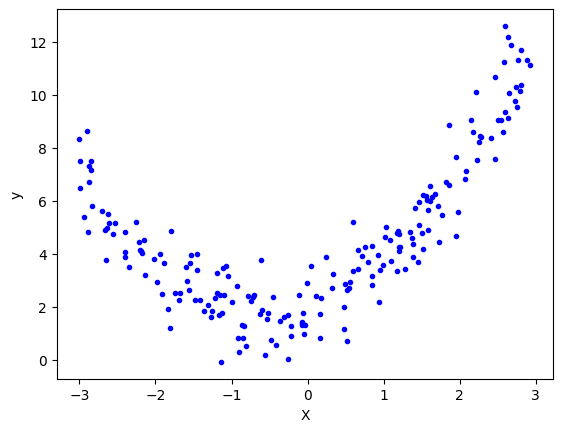

In [5]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Applying Simple Linear Regression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

-0.03790357072706163

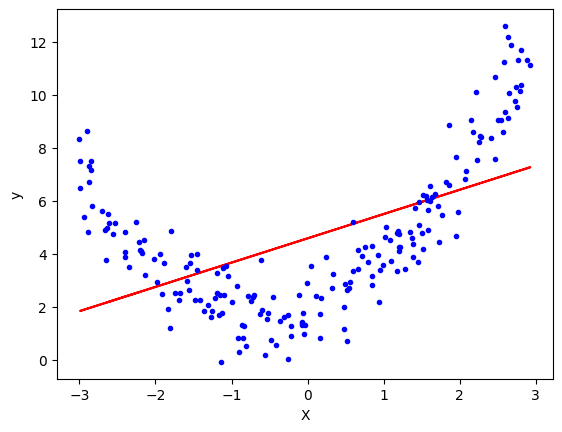

In [10]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Applying Polynomial Regression

In [11]:
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [12]:
print(X_train[0])
print(X_train_trans[0])

[-2.6231348]
[ 1.         -2.6231348   6.88083617]


In [13]:
# include_bias parameter

In [14]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8686392528465462

In [16]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.90224085 0.82506941]]
[2.03624991]


In [17]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

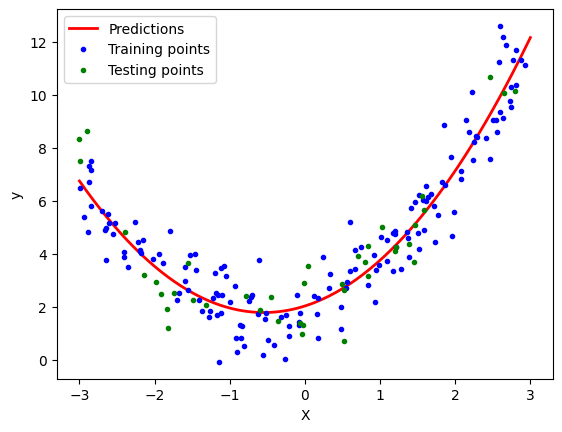

In [18]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Effect of Polynomial Degree on Model Fit

In [19]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

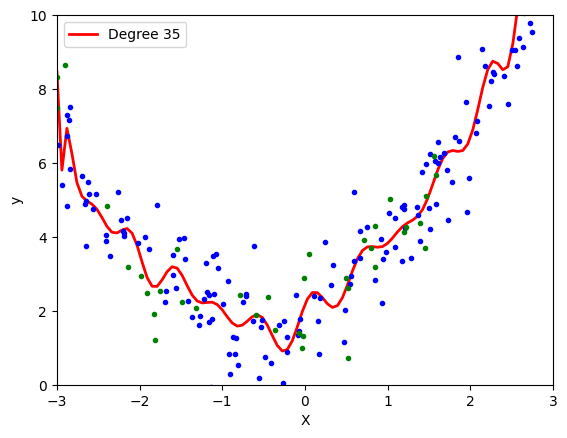

In [21]:
polynomial_regression(35)

In [22]:
poly.powers_

array([[0],
       [1],
       [2]])

### Applying Gradient Descent

C:\Users\Msi Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


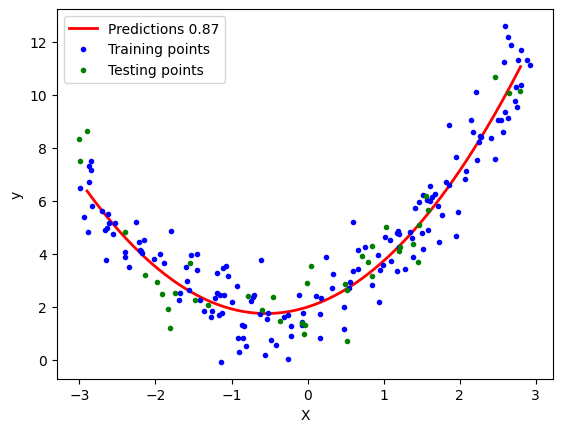

In [23]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 3D polynomial regression

In [24]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

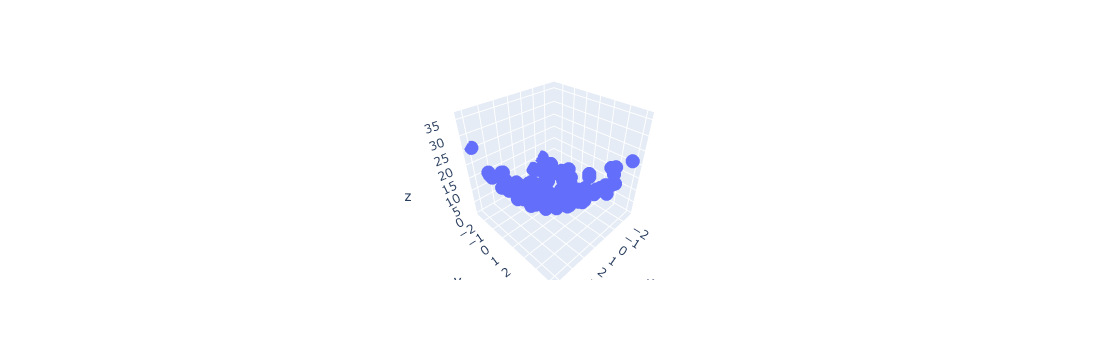

In [25]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [26]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

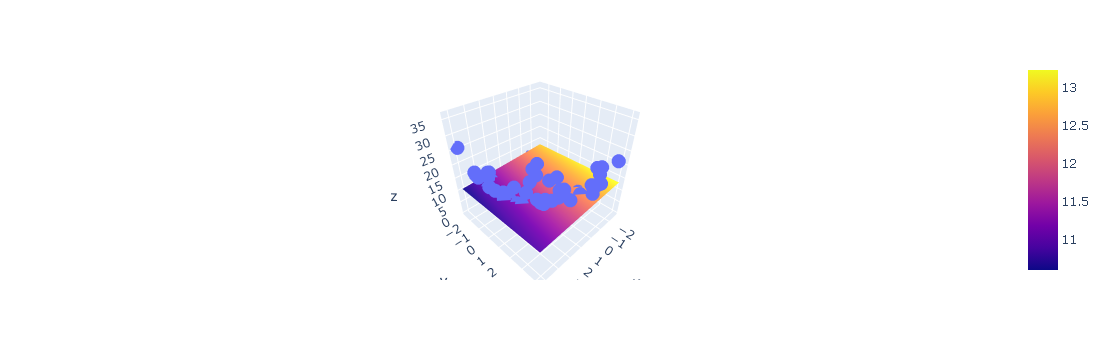

In [27]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [28]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [29]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [31]:
print("Input features:", poly.n_features_in_)
print("Output features:", poly.n_output_features_)
print("Powers:\n", poly.powers_)


Input features: 2
Output features: 496
Powers:
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0

In [32]:
X_multi_trans.shape

(100, 496)

In [33]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
X_test_multi = poly.transform(final)

In [35]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

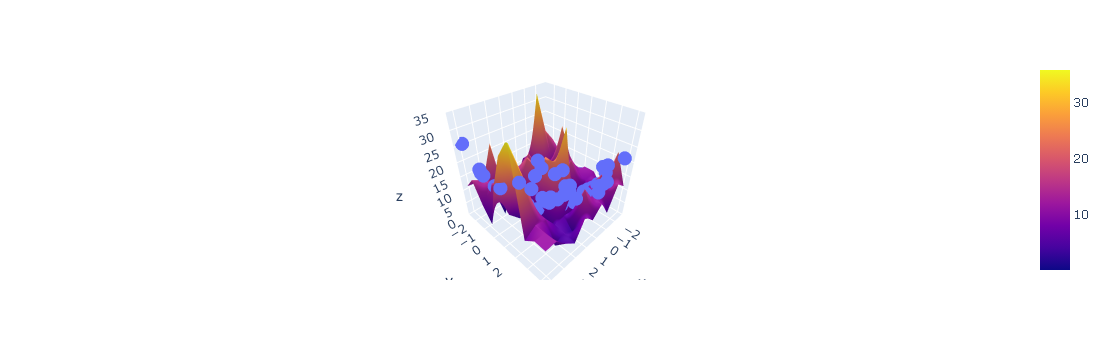

In [36]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()